# Devoir Maison - Calcul Numérique
### Etudiant : Dorian RENARD

Ce devoir est à rendre pour le **lundi 8 novembre 23h00**

L'objectif ici est d'étudier un modèle de classification, la régression logistique. Le modèle sera implémenté dans un premier temps à 1D sur un jeu de données simple, puis de manière **multi-dimensionnelle** sur le dataset iris.

Concernant le rendu, j'attends de vous un notebook python clair et commenté. Vos commentaires sont **personnels** et doivent me permettre d'évaluer votre niveau d'investissement et de compréhension du problème. Vous déposerez vos notebook sur UMTICE dans l'espace dédié.

N'hésitez pas à me solliciter par mail si vous avez un problème.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def plot(xs,ys):
    
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(xs,ys, 'r')    

# Données 

On définit nos données *data*. L'objectif est d'apprendre à reconnaître les tumeurs malignes (*y=1*) des tumeurs bénignes (*y=0*) en fonction de la taille de la tumeur (*x*).

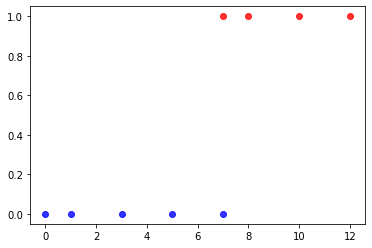

In [3]:
data=[(0,0), (1,0), (3,0), (5,0), (7,0), (7,1), (8,1), (10,1), (12,1)]
xdata=[x for (x,y) in data]
ydata=[y for (x,y) in data]
#on affiche les données les tumeurs malignes et bénignes
plt.figure()
for x,y in data:
    if y ==1:
        plt.scatter(x, y, color='red', alpha=.8)
    else:
        plt.scatter(x, y, color='blue', alpha=.8)
plt.show()

# Partie 1: Modèle en 1D

On choisit de modéliser notre classifieur comme une régression logistique basée sur la fonction sigmoïde. Puisque nos données sont représentées sur une seule dimension, nous avons deux paramètres à apprendre, *theta0* et *theta1*.

In [4]:
#La sigmoïde telle que décrite dans les livres avec les moins devant tous nos paramètres theta
def h(x, teta0, teta1):
    return 1/(1+np.exp(-teta0 - teta1 * x))

En utilisant le fonction `plot` définie plus haut, tracer la fonction sigmoïde entre -12 et 12, avec *theta0=0* et *theta1=1*

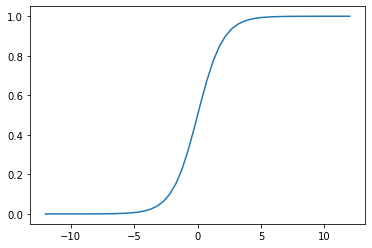

In [5]:
theta0=0
theta1=1
#on créé le vecteur temps entre -12 et 12
y = np.linspace(-12,12)
#on affiche le graphque de la fonction sigmoïde grâce aux theta
plt.plot(y, h(y,theta0, theta1))

### Les paramètres du modèle

Que se passe-t-il lorsque l'on modifie *theta0* et *theta1* ?
*theta0* permet de déplacer la sigmoïde sur l'axe des abscisses quant *theta1* modifie *l'inflexion* de la sigmoïde.

### *Fitter* le modèle à la main

Une fois que l'on connait l'impact de *theta0* et *theta1*, on peut s'amuser à essayer de trouver nous mêmes ces paramètres comme ci-dessous, avec une régression logistique qui classifierait plutôt bien nos données.

Afficher sur le même graphique, vos données et la fonction sigmoïde (entre -12 et 12 donc). Vous définirez un jeu de paramètres `(theta0, theta1)` qui permet à la fonction de s'approcher au mieux des données.

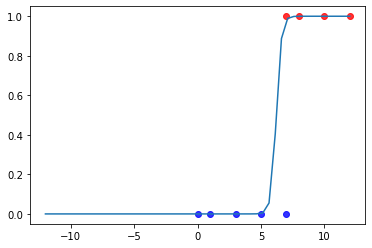

In [6]:
#on affiche la fonction sigmoïde avec les données des tumeurs malignes et bénignes avec des theta0 et theta1 qui permettent à la fonction de s'approcher au mieux des données des tumeurs.
plt.figure()
for x,y in data:
    if y ==1:
        plt.scatter(x, y, color='red', alpha=.8)
    else:
        plt.scatter(x, y, color='blue', alpha=.8)
        
theta0=-31
theta1=5

y = np.linspace(-12,12)
plt.plot(y, h(y,theta0, theta1))
plt.show()
        
        

# *Fitter*/apprendre automatiquement les paramètres du modèle

### La fonction d'erreur *J*

La fonction de coût pour la régression linéaire se définit comme la somme des erreurs quadratiques obtenues sur les N échantillons entre la valeur prédite par le modèle `h(x, theta)` et la valeur de référence `y`. `theta` représente ici le vecteur de paramètres, par exemple `theta = (theta0, theta1)` en 1D.
  
$$J(\theta) = \dfrac{1}{N} \sum_{i=1}^N \left(h(x_i, \theta) - y_i\right)^2$$

On définit alors le coût local obtenu sur l'échantillon i: $J_i (\theta) = \left(h(x_i, \theta) - y_i\right)^2 $

Alors le coût global s'écrit comme la somme des coûts locaux:

$$J(\theta) = \dfrac{1}{N} \sum_{i=1}^N J_i (\theta)$$

Dans le cas de la régression logistique, on cherche à réaliser non plus une régression, mais une classification. Le coût local s'écrit alors:

$$J_i (\theta) = \left\{ \begin{array}{ll} - \log(h(x_i, \theta)) & \text{si} \quad y_i=1\\
- \log(1-h(x_i, \theta)) & \text{si} \quad y_i=0
\end{array}\right.$$

On peut réécrire cette fonction comme suit:
$$J_i(\theta) = - \left[y_i \log(h(x_i, \theta)) + (1 - y_i)\log(1-h(x_i, \theta))\right] $$

* [] *bonus* montrer qu'il y a bien équivalence entre les deux écritures
* [] La fonction de coût est censée pénaliser les valeurs de `theta` qui entraine un éloignement de la valeur prédite par rapport à la valeur de référence. Faites le lien avec la définition mathématique ci-dessus. Notamment quel est l'intérêt d'introduire un logarithme.
* [] Quel est l'inconvénient du logarithme dans ce cas ?
* [] Implémenter cette fonction de coût globale, que l'on notera `jobj`
* [] Observer les valeurs retournées par `jobj` en fonction des différentes valeurs de `theta0, theta1` que vous avez testé auparavant. L'erreur doit être de plus en plus faible lorsqu'on s'approche du paramètre optimal.

Tout d'abord, on calcule la fonction d'erreur *jobj* qu'il s'agit de minimiser, puisque c'est une fonction d'erreur. On constate que l'erreur du modèle *fitté* à la main est faible.

theta0=-7 ; theta1=1

In [7]:
#Questions
# - L'intérêt d'introduire un logarithme c'est qu'il permet de nous retourner un taux d'erreur entre 0 et 1.
#Donc plus ton logarithme est proche de 1, moins d'erreur il y a. 
#Pour la deuxième partie de la formule on fait "1-log(x)" car on veut s'approcher de 0. Ça permet d'inverser les résultats pour pouvoir comparer avec le résultat du "log(x)".
# 
# - L'inconvénient du logarithme dans ce cas c'estr que log(0) n'est pas possibla, ça retourne une erreur et dans la partie de la formule dite juste au dessus on essaye justement de se rapprocher un maximum de 0.


#la fonction jobj permet de calculer l'erreur en fonction des différentes valeurs de theta0 et theta1
def jobj(xdata, ydata, theta0, theta1):
    somme = 0
    for i in range(len(data)):
        somme = somme+(-(ydata[i]*np.log(h(xdata[i], theta0, theta1)) + (1-ydata[i])*np.log(1-h(xdata[i], theta0, theta1))))
    j = 1/len(data)*somme
    return j

theta0=0
theta1=1

print("L'erreur est de : ", jobj(xdata, ydata, theta0, theta1))

L'erreur est de :  1.8959912722793595


### Gradient sur *theta0*



La fonction à minimiser est ici la fonction de coût $J(\theta)$, il faut donc définir son gradient sur le paramètre *theta0*, soit déterminer 
$$\dfrac{\partial J}{\partial \theta_0}(\theta) = \dfrac{1}{N}\sum_{i=1}^N \dfrac{\partial J_i}{\partial \theta_0}(\theta) $$

Pour cela, il faut dériver le coût local par rapport à *theta0*, sachant que $J_i(\theta) = - \left[y_i \log(h(x_i, \theta)) + (1 - y_i)\log(1-h(x_i, \theta))\right] $

$$\dfrac{\partial J_i}{\partial \theta_0} = \dfrac{\partial J_i}{\partial h(x_i, \theta)} \times \dfrac{\partial h(x_i, \theta)}{\partial \theta_0}$$

- [] Démontrer que $\dfrac{\partial J_i}{\partial \theta_0} = h(x_i, \theta) - y_i$
- [] Implémenter une fonction `deltajtheta0` qui prend en entrée un vecteur d'entrée `xdata`, les valeurs de références associées `ydata` et les paramètres du modèle, ici `theta0, theta1`. Cette fonction retourne le gradient sur *theta0*.
- [] Proposer une descente de gradient sur 100 itérations, avec une vitesse d'apprentissage de 1. Vous ajouterez une visualisation de la convergence en fonction des itérations. En partant de (theta0=0 ; theta1=1), on va apprendra via le gradient le paramètre *theta0* qui converge presque vers *-7*.
- [] Varier la vitesse d'apprentissage et observer la convergence

In [8]:
#la fonction deltajtheta0 permet de calculer le gradient sur theta0
def deltajtheta0(xdata, ydata, theta0, theta1):
    x=0
    for i in range(len(data)):
        x = x + (h(xdata[i], theta0, theta1)-ydata[i])*(theta1-theta0)
    gradj = 1/len(data)*x
    return gradj
    

#La descente de Gradient sur 100 itérations 
theta0=0
theta1=1
vitesse_apprentissage = 1
for i in range(100):
    theta0=theta0-vitesse_apprentissage*deltajtheta0(xdata, ydata, theta0, theta1)
    print(theta0)

-0.46385898444062007
-1.1029976740425471
-1.936359522515908
-2.9448994091828666
-4.05557717376192
-5.133084274807807
-5.994478843072294
-6.501371195970083
-6.7058044368998235
-6.7677704734541395
-6.7843312295886316
-6.788587791417351
-6.789670433039346
-6.7899450572120275
-6.790014670906593
-6.79003231400992
-6.79003678533351
-6.7900379184964565
-6.790038205671965
-6.790038278450301
-6.79003829689437
-6.7900383015686145
-6.7900383027531985
-6.790038303053406
-6.790038303129487
-6.790038303148768
-6.790038303153654
-6.790038303154892
-6.790038303155207
-6.790038303155286
-6.790038303155306
-6.790038303155311
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.790038303155312
-6.79

### Gradient sur *theta0* et *theta1*

- [] Démontrer que $\dfrac{\partial J_i}{\partial \theta_1} = x_i \cdot (h(x_i, \theta) - y_i)$
- [] Implémenter une fonction `deltajtheta1` qui prend en entrée un vecteur d'entrée `xdata`, les valeurs de références associées `ydata` et les paramètres du modèle, ici `theta0, theta1`. Cette fonction retourne le gradient sur *theta1*.
- [] Proposer une descente de gradient sur 100 itérations, avec une vitesse d'apprentissage de 1 sur *theta0* et 0.3 sur *theta1*. Vous ajouterez une visualisation de la convergence en fonction des itérations. En partant de (theta0=0 ; theta1=1), on va apprendra via le gradient les paramètres *theta0* et *theta1*. On obtient une erreur encore plus faible avec cette optimisation !
- [] Varier les vitesses d'apprentissage et observer la convergence

<ipython-input-4-a35cad0534bf>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-teta0 - teta1 * x))


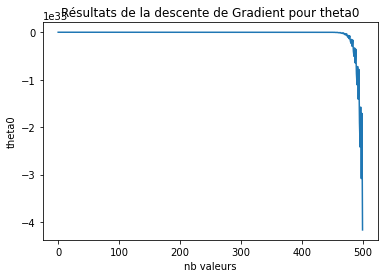

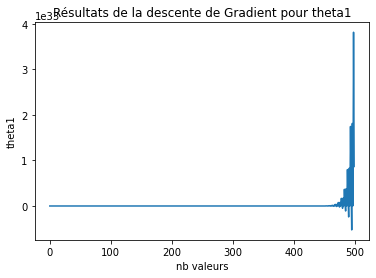

In [11]:
#la fonction deltajtheta1 permet de calculer le gradient sur theta1
def deltajtheta1(xdata, ydata, theta0, theta1):
    d=0
    for i in range(len(data)):
        d=d+(xdata[i] * ((h(xdata[i],theta0, theta1)) - ydata[i]) * (theta1 - theta0))
    return 1/len(data)*d

vitesse_apprentisage0=1
vitesse_apprentisage1=0.3

#Descente de Gradient sur 100 itérations 
theta0=0
theta0_tmp=0
theta1=1
tab_theta0=[]
tab_theta1=[]
for i in range(500):
    tab_theta0.append(theta0)
    tab_theta1.append(theta1)
    theta0_tmp=theta0
    theta0=theta0-vitesse_apprentisage0*deltajtheta0(xdata, ydata, theta0, theta1)
    theta1=theta1-vitesse_apprentisage1*deltajtheta1(xdata, ydata, theta0_tmp, theta1)
    
plt.plot(range(len(tab_theta0)),tab_theta0)
plt.title("Résultats de la descente de Gradient pour theta0")
plt.xlabel("nb valeurs")
plt.ylabel("theta0")
plt.show()

plt.plot(range(len(tab_theta1)),tab_theta1)
plt.title("Résultats de la descente de Gradient pour theta1")
plt.xlabel("nb valeurs")
plt.ylabel("theta1")
plt.show()

### L'erreur J en fonction de *theta0* et *theta1*

Dans un plan 2D, tracer les isoclines de la fonction de coût $J$ en fonction des valeurs des paramètres *theta0* et *theta1*. Vous devriez pouvoir confirmer les valeurs obtenues avec la descente de gradient.

<ipython-input-10-21b1bf61e707>:9: UserWarning: No contour levels were found within the data range.
  CS = plt.contour(theta0, theta1, j_vals, linewidths=1,colors='black')


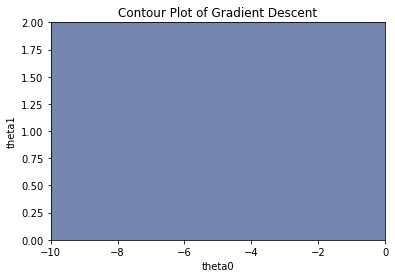

In [10]:
theta0 = np.linspace(-10, 0, 100)
theta1 = np.linspace(0, 2, 100)
j_vals = np.zeros(shape=(theta0.size, theta1.size))

#vous pouvez utiliser cet élément de code afin de visualiser la fonction de coût.
plt.contourf(theta0, theta1, j_vals,alpha=.7)
plt.axhline(color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(color='black', alpha=0.5, dashes=[2, 4],linewidth=1) 
CS = plt.contour(theta0, theta1, j_vals, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("theta0")
plt.ylabel("theta1")
plt.show()

# Partie 2: Régression logistique multi-dimensionnelle.

Pour cette 2ème partie du DM, vous devez reprendre l'ensemble des questions abordées en 1D et les appliquées sur le jeu de données iris vu en TP. Cette fois $x_i$ représentera un vecteur de 4 paramètres, les caractéristiques des fleurs et nous aurons 3 classes en sortie.
La régression logistique permettant une classification binaire, vous devrez réaliser la classification sur 2 classes en même temps.

Cette partie prendra un peu plus de temps de réflexion que la première mais vous permettra de prendre de l'autonomie sur les algorithmes de classification en apprentissage automatique.